<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management, Analysis and Security</h1>

<h2 align='center'> Homework Assessment 02</h2>

*****

Another week, another set of questions! Woohoo! The following set of **4 questions** test your understanding of the lecture and lab material taught during the lectures and the lab exercises in **Weeks 3 & 4**. In the **next lab (Lab 04)**, you'll be asked to complete any one of these exercises by your tutor in **Exam Mode**. Upon completion, you'll be marked by your tutor, based on the correctness and completeness of your solution.

In [445]:
# RUN THIS CELL TO IMPORT THE REQUIRED MODULES
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

### Exercise 1 - Big Money Cars

Extending upon our love for cars (especially the pricey ones!), we decided to have a look at the top 5 car manufacturers from the cars dataset. From the below dataset, help us return a dataset comprising of the **top 5 car manufacturers (in descending order)** along with their **average car prices**. But wait, there's a catch! You only have to do these computations on a subset of the dataset that only contains cars with the body-style `sedan` or `convertible`. Your result should look something like this - 

|    _     | company       | price     |
| -------- |:-------------:| ---------:|
|    6     | car_firm 1    |  1000.000 |
|    8     | car_firm 2    |   980.000 |
|   11     | car_firm 3    |   774.333 |
|    3     | car_firm 4    |   645.000 |
|    1     | car_firm 5    |   510.666 |

In [446]:
# TODO: COMPLETE THE BELOW FUNCTION
import numpy as np
def top_5_pricey(df_cars):
    df1 = df_cars.loc[(df_cars['body-style']=='sedan')| (df_cars['body-style']=='convertible')]
    company1 = df1.groupby(['company'],as_index = False).agg(np.mean) #car of same company's mean
    #print(df1)
    #print(company1)
    df2 = company1.sort_values(by=['price'],ascending=False).head(5)
   
    return df2[['company','price']]

In [447]:
# RUN THIS BLOCK TO TEST YOUR CODE
df_cars = pd.read_csv('automobile.csv')
top_5_pricey(df_cars)

,company,price
11,porsche,37028.000000
6,jaguar,34600.000000
8,mercedes-benz,33256.000000
2,bmw,27213.333333
7,mazda,18344.000000


### Exercise 2 - Gotta Catch 'Em All

Now that we've got you motivated to attempt this question with the title itself, let's get on with it! You've been given a dataset with all the defining characteristics of pokémons (a.k.a **Pokédex**). You need to find the pokémon (and its HP) that has the highest HP (Hit Points) for each Type (`Type 1` and `Type 2` both). Because let's face it, that is an important data science question if you need to catch 'em all! :)

In [458]:
# TODO: COMPLETE THE BELOW FUNCTION
def poke_max_hp(df_pokemon):
    #type1Highest = df_pokemon.sort_values(by=['Type 1','Type 2'])
    #df1 = type1Highest[['Type 1','Type 2','Name','HP']]
    df1 = df_pokemon.fillna(value= 'a')                    #fill in a in empty values
    df1 = df1.sort_values(by=['HP'],ascending=False)
    df1 = df1.groupby(['Type 1','Type 2'],as_index = False).first() 
    df1 = df1[['Type 1','Type 2','Name','HP']]

    #df3 = df_pokemon.fillna(value= 'a')
    #df3 = df3.sort_values('HP',ascending=False).groupby(['Type 1','Type 2'],as_index=False).first()
    #df3 = df3[['Type 1','Type 2','Name','HP']]
    return df1

In [459]:
# RUN THIS BLOCK TO TEST YOUR CODE
df_pokemon = pd.read_csv('pokemon.csv')
poke_max_hp(df_pokemon)

,Type 1,Type 2,Name,HP
0,Bug,Electric,Galvantula,70
1,Bug,Fighting,HeracrossMega Heracross,80
2,Bug,Fire,Volcarona,85
3,Bug,Flying,Yanmega,86
4,Bug,Ghost,Shedinja,1
5,Bug,Grass,Leavanny,75
6,Bug,Ground,WormadamSandy Cloak,60
7,Bug,Poison,Venomoth,70
8,Bug,Rock,Crustle,70
9,Bug,Steel,Forretress,75


### Exercise 3 - Pump Up The V6

In our quest to find the perfect car to buy, we forgot to analysis the popularity of **no. of cylinders in the car engine** among the various **car manufacturers**. Make a plot that shows us how many companies make a particular `num-of-cylinders` engine. You're free to choose any appropriate plot for this exercise. Don't forget to label and title your plot!   

In [420]:
# TODO: COMPLETE THE BELOW FUNCTION
def plot_cyl_companies(df_cars):
    df1 = df_cars.groupby(['company','num-of-cylinders'],as_index = False).count()
    df2 = df1.groupby(['num-of-cylinders'],as_index = False).count()

    plt.bar(df2['num-of-cylinders'],df2['company'])
    plt.ylabel("company")
    plt.xlabel("num-of-cylinders")
    plt.title('Barchart for No. of Cylinders Company used', fontsize=22)
    plt.show()
    return df2[['company','num-of-cylinders']]


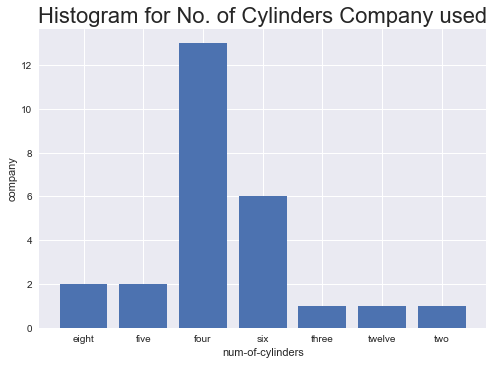

,company,num-of-cylinders
0,2,eight
1,2,five
2,13,four
3,6,six
4,1,three
5,1,twelve
6,1,two


In [421]:
# RUN THIS BLOCK TO TEST YOUR CODE
df_cars = pd.read_csv('automobile.csv')
plot_cyl_companies(df_cars)

### Exercise 4 - Speed v/s Power

Two of your tutors (whose names shall not be revealed) are fighting over which is a more important characteristic to have while choosing a pokémon for battle. You have to resolve this conflict by drawing a plot to compare the distribution of values for the columns `Speed` and `HP` and also, return a tuple containing the overall mean of both columns.

In [443]:
# TODO: COMPLETE THE BELOW FUNCTION
def poke_conflict_resolution(df_pokemon):
    plt.boxplot([(df_pokemon['Speed']), (df_pokemon['HP'])],labels=['Speed','HP'])
    plt.ylabel('Value')
    plt.title('Distribution of Speed and HP')
    plt.show()
    #tuple=(['Speed',df_pokemon['Speed'].mean()],['HP',df_pokemon['HP'].mean()])
    
    plt.scatter(df_pokemon.index,df_pokemon['Speed'],c='Blue',label='Speed') #index is the key
    plt.scatter(df_pokemon.index,df_pokemon['HP'],c='Red',label='HP')
    plt.xlabel('Blue:Speed Red:HP')
    plt.ylabel('Value')
    plt.title("Distribution of Speed and HP")
    plt.show()
    
    mean_speed = df_pokemon['Speed'].mean()
    mean_HP = df_pokemon['HP'].mean()
    tuple = ('Speed',mean_speed,'HP',mean_HP)
    
    return tuple

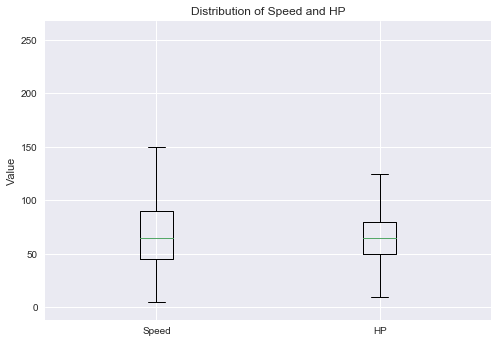

TypeError: scatter() missing 1 required positional argument: 'y'

In [444]:
# RUN THIS BLOCK TO TEST YOUR CODE
df_pokemon = pd.read_csv('pokemon.csv')
poke_conflict_resolution(df_pokemon)